In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file='/Users/ankit/Downloads/yelp_dataset/yelp_review_short.csv'

In [3]:
df= pd.read_csv(file)

In [4]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38


In [5]:
df[df.stars==5].count

<bound method DataFrame.count of                    review_id                 user_id             business_id  \
1     GJXCdrto3ASJOqKeVWPi6Q  yXQM5uF2jS6es16SJzNHfg  NZnhc2sEQy3RmzKTZnqtwQ   
2     2TzJjDVDEuAW6MR5Vuc1ug  n6-Gk65cPZL6Uz8qRm3NYw  WTqjgwHlXbSFevF32_DJVw   
3     yi0R0Ugj_xUx_Nek0-_Qig  dacAIZ6fTM6mqwW5uxkskg  ikCg8xy5JIg_NGPx-MSIDA   
15    svK3nBU7Rk8VfGorlrN52A  NJlxGtouq06hhC7sS2ECYw  YvrylyuWgbP90RgMqZQVnQ   
18    rEITo90tpyKmEfNDp3Ou3A  6Fz_nus_OG4gar721OKgZA  6lj2BJ4tJeu7db5asGHQ4w   
20    Amo5gZBvCuPc_tZNpHwtsA  DzZ7piLBF-WsJxqosfJgtA  qx6WhZ42eDKmBchZDax4dQ   
21    IPw8yWiyqnfBzzWmypUHgg  5JVY32_bmTBfIGpCCsnAfw  Mem13A3C202RzT53npn4NA   
23    S337tATeouQJdoPYyir29w  2mxBNBeFrgDszqGS5tdEHA  d_L-rfS1vT3JMzgCUGtiow   
24    D_UvaenM25iNd6aehTZ0MA  8NwU4TRsD3S6gIfBqFzDMQ  Sfc8Haz2Yri8Mo1L0E0TsA   
25    I9HBDyzCqLhTYHCAZIFZQQ  vXZeHaLvdfCPATz5BDavow  FQ1wBQb3aNeRMThSQEV0Qg   
27    qm97yMwREr7BKkexlwLFbg  TTRVdTXKcq-xn6-1IWbwEw  Gyrez6K8f1AyR7dzW9fvAw   
30    0

In [6]:
df.describe()

,stars,useful,funny,cool
count,10000.000000,10000.00000,10000.000000,10000.000000
mean,3.716700,1.29820,0.458000,0.559000
std,1.471549,2.90264,1.557973,2.056682
min,1.000000,0.00000,0.000000,0.000000
25%,3.000000,0.00000,0.000000,0.000000
50%,4.000000,0.00000,0.000000,0.000000
75%,5.000000,1.00000,0.000000,0.000000
max,5.000000,91.00000,42.000000,86.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
review_id      10000 non-null object
user_id        10000 non-null object
business_id    10000 non-null object
stars          10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
cool           10000 non-null int64
text           10000 non-null object
date           10000 non-null object
dtypes: int64(4), object(5)
memory usage: 703.2+ KB


In [8]:
df.dropna(inplace=True)

In [9]:
df.count()

review_id      10000
user_id        10000
business_id    10000
stars          10000
useful         10000
funny          10000
cool           10000
text           10000
date           10000
dtype: int64

In [10]:
df['length'] = df['text'].apply(len)


In [11]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36,204
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33,1567
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03,615
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38,413
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38,3509


In [12]:
import seaborn as sns

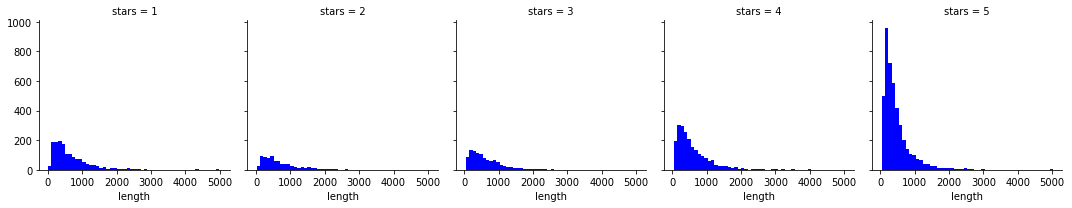

In [13]:
# COMPARING TEXT LENGTH TO STARS
graph = sns.FacetGrid(data=df,col='stars')
graph.map(plt.hist,'length',bins=50,color='blue')

We can see the length of reviews was more for 5 stars.

In [14]:
# GETTING THE MEAN VALUES OF THE VOTE COLUMNS WRT THE STARS ON THE REVIEW
stval = df.groupby('stars').mean()
stval

,useful,funny,cool,length
stars,,,,
1,1.901897,0.576848,0.243950,711.079137
2,1.518750,0.655000,0.426250,730.323750
3,1.292523,0.514019,0.609346,681.386916
4,1.332568,0.562701,0.847037,623.055122
5,1.034132,0.316230,0.537975,470.524638


In [15]:
stval.corr()


,useful,funny,cool,length
useful,1.000000,0.711053,-0.657042,0.777206
funny,0.711053,1.000000,-0.166384,0.932967
cool,-0.657042,-0.166384,1.000000,-0.354818
length,0.777206,0.932967,-0.354818,1.000000


Thus, we can see that there is negative correlation between:

* Cool and Useful
* Cool and Funny
* Cool and Length  
Thus, we can say that the reviews marked cool tend to be curt, not very useful to others and short.
Whereas, there is a positive correlation between:

* Funny and Useful    
* Funny and Length
* Useful and Length    
Thus, we can say that longer reviews tend to be funny and useful.

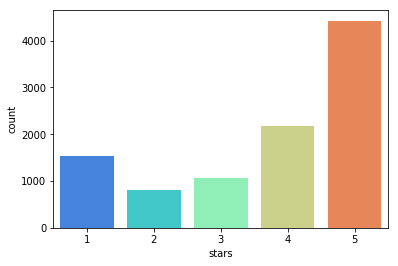

In [16]:
sns.countplot(x='stars',data=df,palette = 'rainbow')


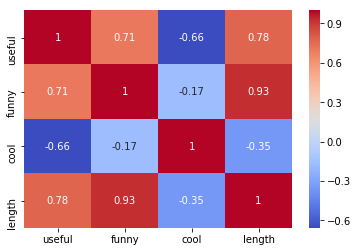

In [17]:
sns.heatmap(stval.corr(),cmap='coolwarm',annot=True)


Let's move on to the actual task. To make things a little easier, go ahead and only grab reviews that were either 1 star or 5 stars.

Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.



In [18]:
yelp_class=df[(df['stars']==1)|(df['stars']==5)]
yelp_class.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36,204
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33,1567
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03,615
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38,413
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38,3509


Set the index with review_id

In [19]:
yelp_class.set_index('review_id')

,user_id,business_id,stars,useful,funny,cool,text,date,length
review_id,,,,,,,,,
Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36,204
GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33,1567
2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03,615
yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38,413
11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38,3509
8e9HxxLjjqc9ez5ezzN7iQ,d6xvYpyzcfbF_AZ8vMB7QA,zvO-PJCpNk4fgAVUnExYAA,1,3,1,1,This place has gone down hill. Clearly they h...,2010-10-05 19:12:35,380
-I5umRTkhw15RqpKMl_o1Q,-mA3-1mN4JIEkqOtdbNXCQ,mRUVMJkUGxrByzMQ2MuOpA,1,0,1,0,"Walked in around 4 on a Friday afternoon, we s...",2017-12-15 23:27:08,434
JVcjMhlavKKn3UIt9p9OXA,TpyOT5E16YASd7EWjLQlrw,AakkkTuGZA2KBodKi2_u8A,1,1,1,0,I cannot believe how things have changed in 3 ...,2012-07-16 00:37:14,968
svK3nBU7Rk8VfGorlrN52A,NJlxGtouq06hhC7sS2ECYw,YvrylyuWgbP90RgMqZQVnQ,5,0,0,0,You can't really find anything wrong with this...,2017-04-07 21:27:49,405


In [20]:
business=df.business_id.unique()

In [21]:
business.shape

(4618,)

So their are total of 4618 bussiness reviewed in the above dataset.

## Sentiment Analysis consists of two parts; Subjectivity and Polarity. Simply, Polarity and Subjectivity can be explained as follows:
Polarity — It simply means emotions expressed in a sentence, across a range of negative, to positive.
Subjectivity — Subjective sentence expresses some personal feelings, views, or beliefs.

In [22]:
!pip install textblob


In [23]:
from textblob import TextBlob


In [24]:
COLS = ['date','text', 'sentiment','subjectivity','polarity']
df_new = pd.DataFrame(columns=COLS)


In [25]:
from itertools import islice


In [26]:
for index, row in islice(df.iterrows(), 0, None):

     new_entry = []
     text_lower=(row['text'].lower())
     blob = TextBlob(text_lower)
     sentiment = blob.sentiment
     polarity = sentiment.polarity
     subjectivity = sentiment.subjectivity
     new_entry += [row['date'],text_lower,sentiment,subjectivity,polarity]
     single_survey_sentimet_df = pd.DataFrame([new_entry], columns=COLS)
     df_new = df_new.append(single_survey_sentimet_df, ignore_index=True)
df_new.to_csv('Yelp_Text_Sentiment_Values.csv', mode='w', columns=COLS, index=False, encoding="utf-8")


In [27]:
df_new.shape

(10000, 5)

In [28]:
df_new.head()

,date,text,sentiment,subjectivity,polarity
0,2013-05-07 04:34:36,total bill for this horrible service? over $8g...,"(-0.3333333333333333, 0.6166666666666667)",0.616667,-0.333333
1,2017-01-14 21:30:33,i *adore* travis at the hard rock's new kelly ...,"(0.3158096408096408, 0.5366678366678367)",0.536668,0.315810
2,2016-11-09 20:09:03,i have to say that this office really has it t...,"(0.429125, 0.5840000000000001)",0.584000,0.429125
3,2018-01-09 20:56:38,went in for a lunch. steak sandwich was delici...,"(0.8324999999999999, 0.885)",0.885000,0.832500
4,2018-01-30 23:07:38,today was my second out of three sessions i ha...,"(0.04927662037037037, 0.43240740740740735)",0.432407,0.049277


In [29]:
df_new.describe()

,subjectivity,polarity
count,10000.000000,10000.000000
mean,0.556653,0.237336
std,0.136217,0.231866
min,0.000000,-1.000000
25%,0.479207,0.100106
50%,0.555021,0.238889
75%,0.635556,0.377350
max,1.000000,1.000000


So my program has confirmed to me that all the 10000 records are there and gave me a mean polarity of 0.24, which is good that means as an average, most people are in between neutral to positive with the services.
And as you can see the 50% Value which means the median is above zero i.e., 0.24. 

Text(0, 0.5, 'Range')

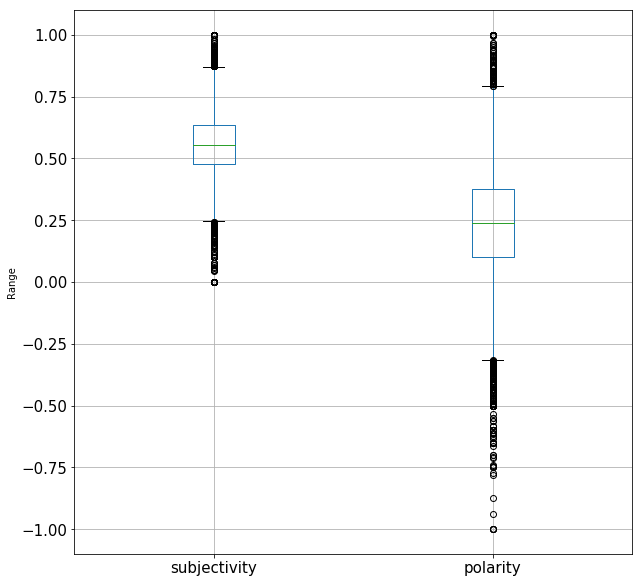

In [30]:
#boxplot for df_new

boxplot = df_new.boxplot(column=['subjectivity','polarity'], 
                     fontsize = 15,grid = True, vert=True,figsize=(10,10,))
plt.ylabel('Range')

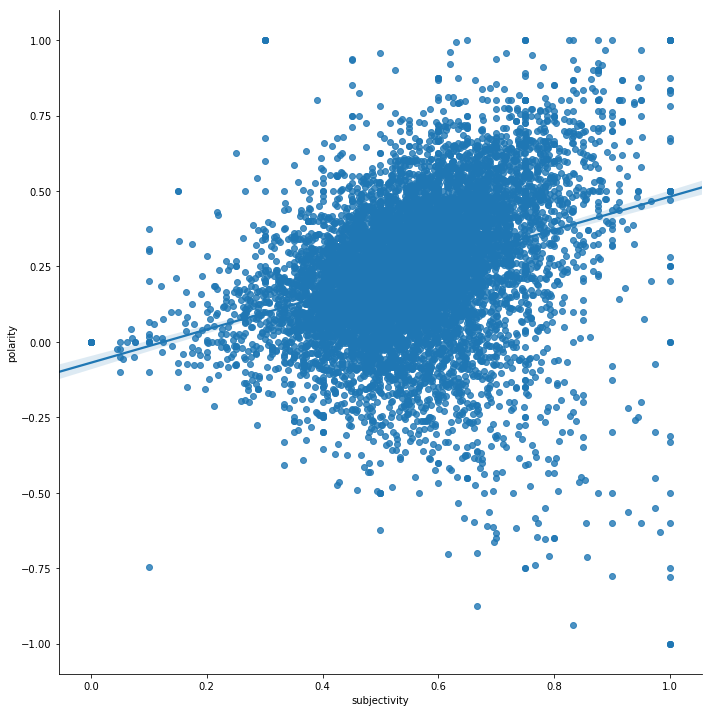

In [31]:
#scatter for dffilter

sns.lmplot(x='subjectivity',y='polarity',data=df_new,fit_reg=True,scatter=True, height=10,palette="mute") 


The scatter diagram is used to find the covariance and correlation between two variables. This diagram helps you determine how closely the two variables are related. After determining the correlation between the variables, you can then predict the behavior of the dependent variable based on the measure of the independent variable.

In [32]:
#covariance and correlation for df_new
# calculate the covariance between two variables

from numpy.random import randn
from numpy.random import seed
from numpy import cov
from scipy.stats import pearsonr

# prepare data
data1 = df_new['subjectivity']
data2 = data1 + df_new['polarity']
# calculate covariance matrix
covariance = cov(data1, data2) 
print(covariance)

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

[[0.018555   0.02876936]
 [0.02876936 0.09274557]]
Pearsons correlation: 0.69351


The covariance between the two variables is 0.0287693. We can see that it is positive, suggesting the variables change in the same direction as we expect.

We can see that the two variables are positively correlated and that the correlation is 0.69351. This suggests a high level of correlation, e.g. a value above 0.5 and close to 1.0.

### The plot shows a positive correlation between Subjectivity and Polarity.
Meaning, as subjectivity increase, the polarity in the response increase too, Or in other words, the more strong feelings are expressed, the more the overall comment is subjective.

In [33]:
a=df.text[0]

In [36]:
!pip install wordcloud


    100% |████████████████████████████████| 163kB 4.5MB/s ta 0:00:01


In [40]:
from wordcloud import WordCloud

In [49]:
from wordcloud import STOPWORDS

In [71]:
stopwords = set(STOPWORDS)
stopwords.update(["alway","told","us","back","really","great","said","go","way","still","","Total","will","come","much","think","good", "food", "got", "get","came","even","ordered","well","place","one"])

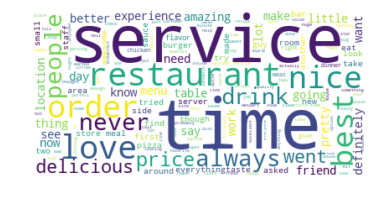

In [72]:
text1="".join(review for review in df.text)
wordcloud=WordCloud(stopwords=stopwords,background_color="white").generate(text=text1)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

From the above wordcloud we can see that most common theme was Service, Timings, Table service, Drinks more than food,location and in the food section it was pizza and burger.

### Model Preparation

In [27]:
# Seperate the dataset into X and Y for prediction
X = yelp_class['text']
y = yelp_class['stars']
print(X.head())
print(y.head())

0    Total bill for this horrible service? Over $8G...
1    I *adore* Travis at the Hard Rock's new Kelly ...
2    I have to say that this office really has it t...
3    Went in for a lunch. Steak sandwich was delici...
4    Today was my second out of three sessions I ha...
Name: text, dtype: object
0    1
1    5
2    5
3    5
4    1
Name: stars, dtype: int64
